# Visualization of the results produced by clustering algorithm to solve customer segmentation task

In [42]:
# Import dependences
import os
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

import pandas as pd
import datetime
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.cm as cm
matplotlib.rcParams.update({'font.size': 18})

%matplotlib inline

import seaborn as sns

import plotly as py
import plotly.graph_objs as go

from sklearn.manifold import TSNE

import random
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams.update({'font.size': 14})

In [4]:
# Load data
df = pd.read_csv("../MapReduce_Customer_Segmentation/src/main/scala/Resources/kmeans_scalable_clustering_results_onlineretail.csv")

In [5]:
df.describe()

,Recency,MonetaryValue,Frequency,Cluster
count,5881.000000,5881.000000,5881.000000,5881.000000
mean,2.921583,4.888923,1.913750,1.791022
std,1.000000,1.000000,1.000000,1.219329
min,0.452612,0.000000,0.856271,0.000000
25%,2.153411,4.188564,0.856271,1.000000
50%,2.987751,4.853818,1.712543,2.000000
75%,3.880725,5.538016,2.568814,3.000000
max,4.314125,9.523467,7.398395,4.000000


### Types of customers:
- **Best/Core Customers**: Bought most recently, most often and sped the most. Marketing = no price incentives, new products or loyality programs. Focus on value added offers through product recommendations based on previous purchases.
- **Loyal Customers**: Buy most frequently. Marketing = Advocacy programs and reviews are also common X1X strategies. Lastly, consider rewarding these customers with Free Shipping or other like benefits.
- **Big Senders**: Spend the most. Marketing = Market your most expensive products. premium offers, subscription tiers, luxury products, or value add cross/up-sells to increase AOV. Don't waste margin on discounts. 
- **Promising Customers**: Customers who are in some way new (low recency), they do not have spend a lot. Start building relationships with these customers by providing onboarding support and special offers to increase their visits.
- **Almost Lost**: Haven't purchased for some time, but purchased frequently and spend the most. Marketing = Aggressive price incentives and new products launches.
- **Lost Cheap Customers**: Last purchased long ago, purchased few and spent little. Marketing = Don't spend too much trying to re acquire.

In [6]:
# Fix costants

num_clusters = 5
# cluster_names = ["Best Customers", "Loyal Customers", "Big Spenders", "Almost Lost", "Lost Customers"]
# d1={0: cluster_names[0], 1: cluster_names[1], 2: cluster_names[2], 3: cluster_names[3]}

In [7]:
df_count = df.groupby('Cluster').count()
df_count

,Recency,MonetaryValue,Frequency
Cluster,,,
0,1120,1120,1120
1,1278,1278,1278
2,1670,1670,1670
3,1337,1337,1337
4,476,476,476


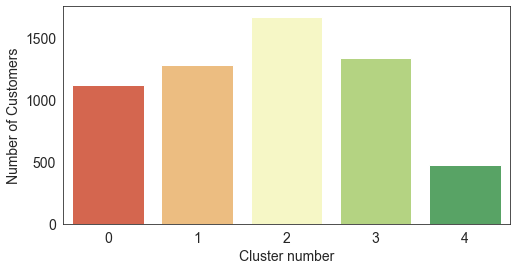

In [43]:
# number of customers per cluster

df_count = df.groupby('Cluster').count()

plt.figure(figsize=(8,4))
ax = sns.barplot(x=df_count.index, y="Recency", data=df_count, palette='RdYlGn')
ax.set_xlabel('Cluster number')
ax.set_ylabel('Number of Customers')
plt.show()

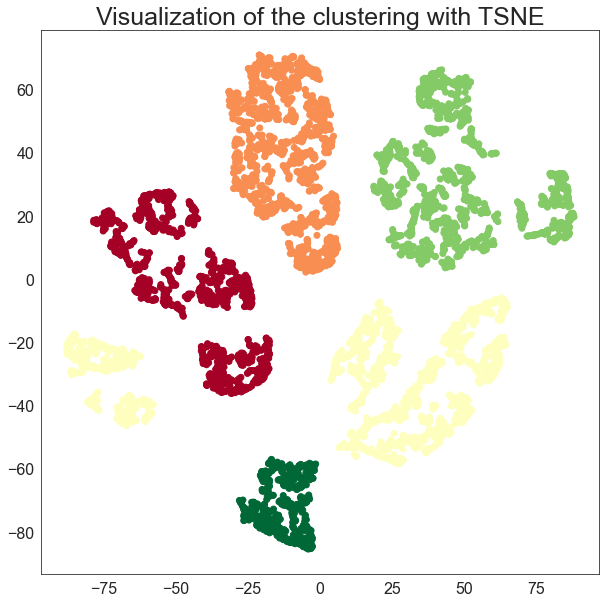

In [40]:
# Visualization of the clustering with tsne
tsne = TSNE(n_components=2)
proj = tsne.fit_transform(df)

plt.figure(figsize=(10,10))
plt.scatter(proj[:,0], proj[:,1], c=df['Cluster'], cmap='RdYlGn')
plt.title("Visualization of the clustering with TSNE", fontsize="25")
plt.show()

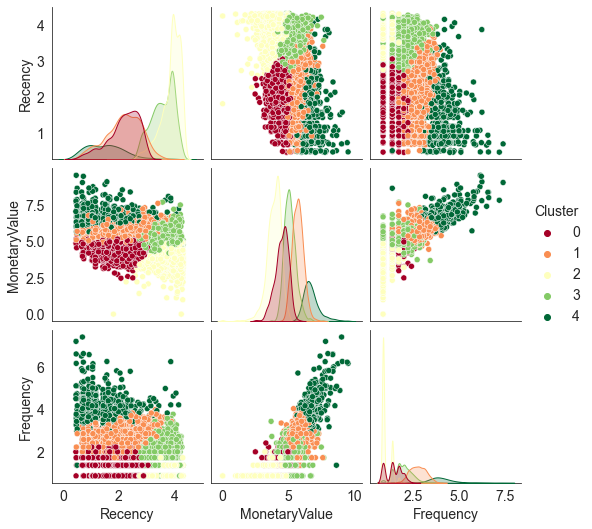

In [44]:
# Pair plot
sns.pairplot(hue='Cluster', data=df, diag_kind='kde', palette='RdYlGn') # palette='magma'

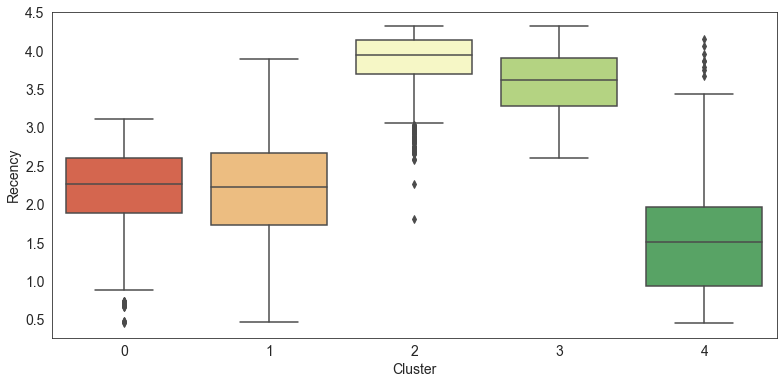

In [45]:
# Box plot
plt.figure(figsize=(13,6))
sns.boxplot(df['Cluster'],df['Recency'], palette='RdYlGn')
plt.show()

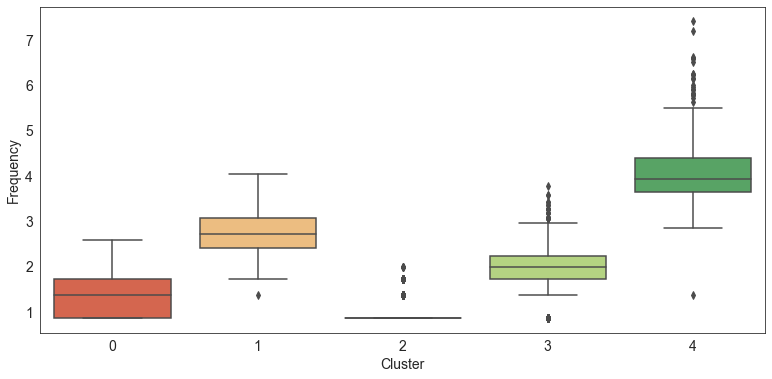

In [46]:
plt.figure(figsize=(13,6))
sns.boxplot(df['Cluster'],df['Frequency'], palette='RdYlGn')
plt.show()

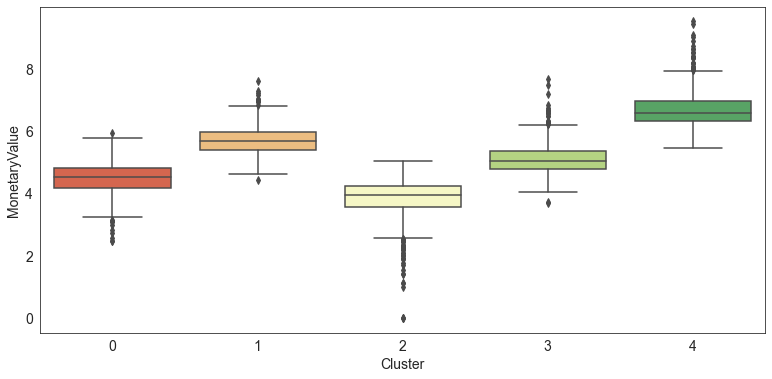

In [47]:
plt.figure(figsize=(13,6))
sns.boxplot(df['Cluster'], df['MonetaryValue'], palette='RdYlGn')
plt.show()

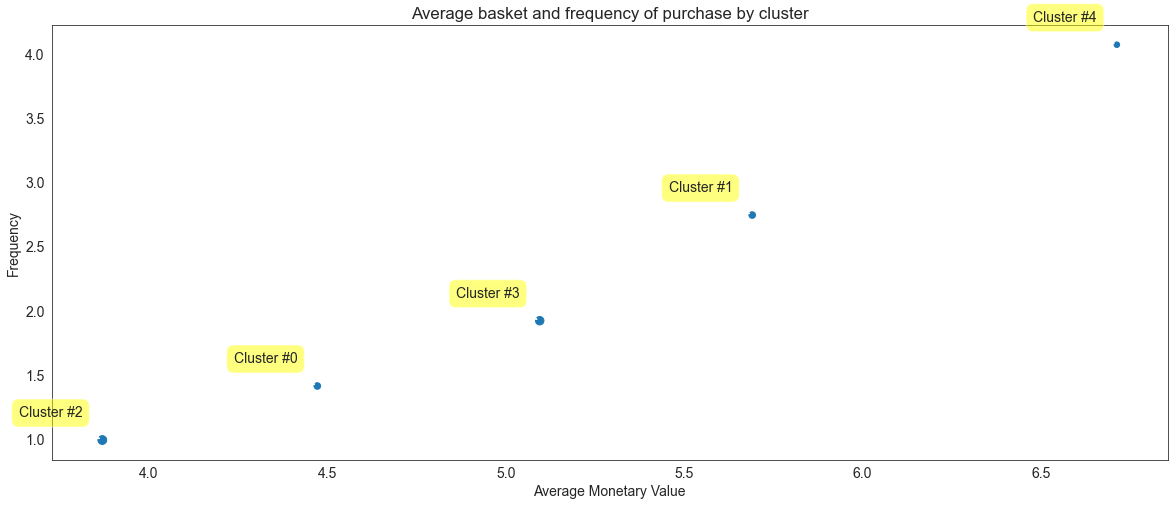

In [48]:
# dot plot

df_analysis = df.groupby("Cluster").mean()

price = df_analysis["MonetaryValue"].values
freq = df_analysis["Frequency"].values
visit = df_analysis["Recency"].values

plt.figure(figsize = (20,8))
plt.scatter(price, freq, s=visit*20)
    
for label, x, y in zip(["Cluster #{}".format(x) for x in range(num_clusters)], price, freq):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
plt.title("Average basket and frequency of purchase by cluster")
plt.xlabel("Average Monetary Value")
plt.ylabel("Frequency")
plt.show()

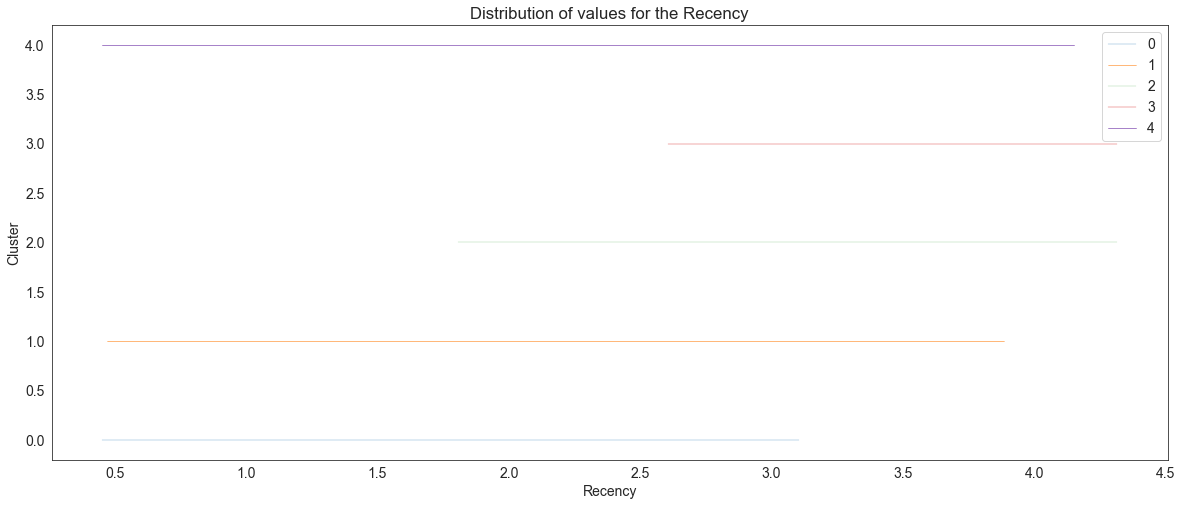

In [49]:
tmp_min = df.groupby("Cluster").min()
tmp_max = df.groupby("Cluster").max()

x_max = tmp_min["Recency"].values
x_min = tmp_max["Recency"].values
freq = df_analysis["Frequency"].values

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.figure(figsize = (20,8))
for i in range(num_clusters):
    plt.plot([x_min[i] , x_max[i]], [i, i], linewidth=freq[i]/num_clusters)

# plt.xlim(-365, 0)
plt.title("Distribution of values for the Recency")
plt.xlabel("Recency")
plt.ylabel("Cluster")
plt.legend(range(num_clusters))
plt.show()

In [ ]:
# # Scatter plot

# # step 4_1: data preparation
# R=[]
# F=[]
# M=[]

# def random_color():
#     rgbl=[255,0,0]
#     random.shuffle(rgbl)
#     return tuple(rgbl)

# # mycolors = []
# # for i in range(num_clusters): mycolors[i] = random_color
# #mycolors=['navajowhite','lightsteelblue','mediumaquamarine','thistle']
# # mycolors = list(np.random.choice(range(256), size=num_clusters))
# mycolors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(num_clusters)]

# cluster_orders = range(num_clusters)
# for i in range(num_clusters):
#     R.append(df.loc[df["Cluster"]==cluster_orders[i],'Recency'].values.tolist())
#     F.append(df.loc[df["Cluster"]==cluster_orders[i],'Frequency'].values.tolist())
#     M.append(df.loc[df["Cluster"]==cluster_orders[i],'MonetaryValue'].values.tolist())
    
# # step 4_2: 3D scatter plot
# fig=plt.figure(figsize=(15,7))
# ax=Axes3D(fig)
# for i in [0,1,2,3]:
#     ax.scatter(R[i], F[i], M[i], c=mycolors[i], marker='o',alpha=0.5, label='cluster '+str(cluster_orders[i]))
# ax.set_xlabel('Recency')
# ax.set_ylabel('Frequency')
# ax.set_zlabel('Monetary Value($)')
# ax.set_xlim(0,4)
# ax.set_xticks(list(range(5)))
# ax.legend()
# # ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.show()

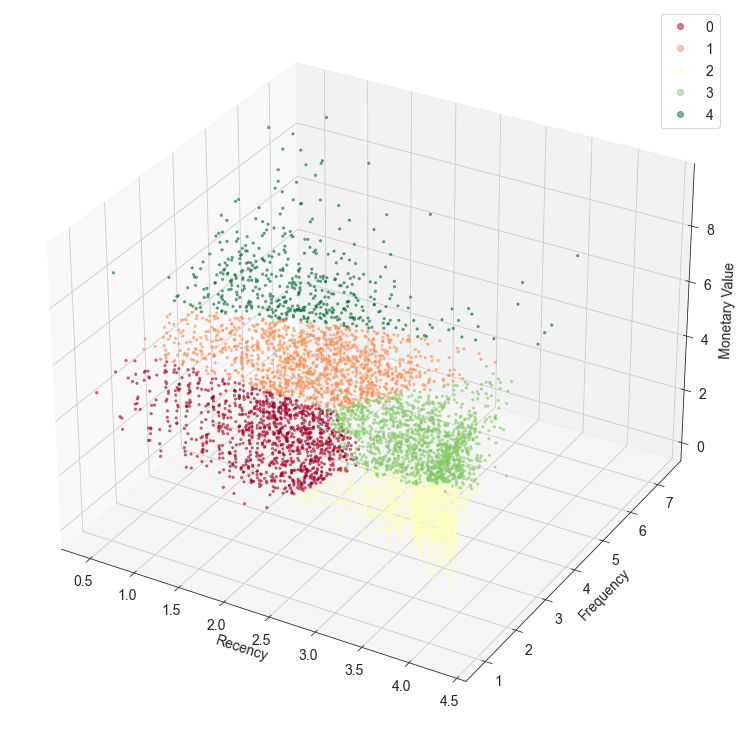

In [50]:
# 3D scatter plot

fig = plt.figure(figsize=(15, 10))
ax=Axes3D(fig)
# ax = fig.add_subplot(111, projection='3d')

xs = df.Recency
ys = df.Frequency
zs = df.MonetaryValue
scatter = ax.scatter(xs, ys, zs, s=5, c=df.Cluster, cmap='RdYlGn', marker='o',alpha=0.5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
ax.legend(*scatter.legend_elements())

plt.show()

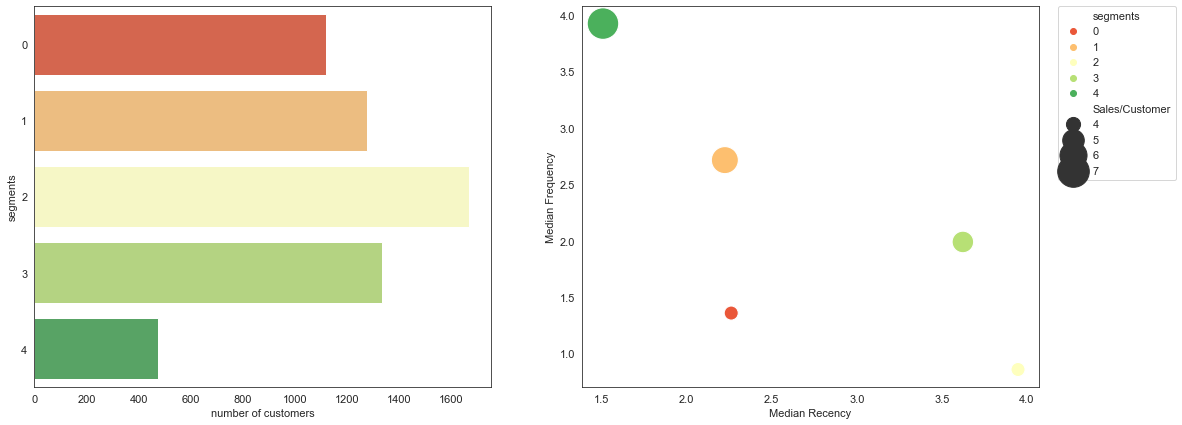

In [64]:
# replace k-means cluster names with more meaningful names
df.loc[:,"segments"] = df.loc[:,"Cluster"].apply(str)#.map(d1)


# calculate the number of customers, median recency, median frequency, 
# and average customer spend in each customer segment
df_RFM3=df.groupby('segments').agg(Recency=('Recency',np.median),Frequency=('Frequency',np.median),
                                        MonetarySum=('MonetaryValue',np.sum),size=("Cluster",'size'))
df_RFM3.loc[:,'Sales/Customer']=round(df_RFM3.loc[:,'MonetarySum']/df_RFM3.loc[:,'size'])
df_RFM3=df_RFM3.astype({'Sales/Customer':int}).reset_index()


f, axes = plt.subplots(1, 2, figsize=(18,7))
sns.set_style("white")
seg = df.groupby('segments').size().to_frame().rename(columns={0:'number of customers'}).reset_index()
sns.barplot(ax= axes[0], x='number of customers', y='segments', data=seg, palette='RdYlGn')
sns.scatterplot(ax=axes[1], x='Recency', y='Frequency', hue='segments', palette='RdYlGn', size='Sales/Customer',
                sizes=(200,1000), legend=True, data=df_RFM3)
axes[1].set_xlabel('Median Recency')
axes[1].set_ylabel('Median Frequency')
axes[1].legend(bbox_to_anchor=(1.30, 1),
           borderaxespad=0)
plt.show()

# # visualize
# plt.figure(figsize=(10,4))

# # plot the number of customers in each segment
# sns.set_style("white")
# plt.axes([0, 0, 0.38, 0.9])
# seg = df.groupby('segments').size().to_frame().rename(columns={0:'number of customers'}).reset_index()
# ax1 = sns.barplot(x='number of customers', y='segments', data=seg, order=cluster_names[0: num_clusters], palette='RdYlGn') # palette=mycolors
# for i in [0,1,2,3]:
#     number=int(seg.loc[seg.segments==cluster_names[i],'number of customers'])
#     x_pos=round(number,-2)
#     plt.text(x_pos,i,number)
# plt.ylabel("")
# sns.despine()

# # plot recency, frequency, and average spend/customer of the 4 segments
# plt.axes([0.5,0, 0.42,0.9])
# ax2 = sns.scatterplot(x='Recency', y='Frequency', hue='segments', palette='RdYlGn', size='Sales/Customer',
#                 sizes=(200,1000), legend=False, data=df_RFM3)
# # plt.ylim(0,35)
# # plt.xticks(list(range(5)))
# # plt.text(1,29,'average "Loyal Customer": $146')
# # plt.text(2,16,'average "Potential Loyalist": $72')
# # plt.text(0,6,'average "New Customer": $24')
# # plt.text(3,6,'average "At-Risk": $24')
# plt.xlabel('Median Recency')
# plt.ylabel('Median Frequency')
# ax2.legend(df_RFM3.segments)
# sns.despine()
# plt.show()

In [60]:
# Calculate average RFM values for each cluster
cluster_avg = df.drop("segments", 'columns').groupby("Cluster").mean()

# Calculate average RFM values for the total customer population
population_avg = df.drop("segments", 'columns').mean()

# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1

# Print relative importance scores rounded to 2 decimals
print(relative_imp.iloc[:, 1:].round(2))

         Frequency  MonetaryValue  Recency
Cluster                                   
0            -0.26          -0.09    -0.26
1             0.43           0.16    -0.26
2            -0.48          -0.21     0.33
3             0.00           0.04     0.22
4             1.13           0.37    -0.47


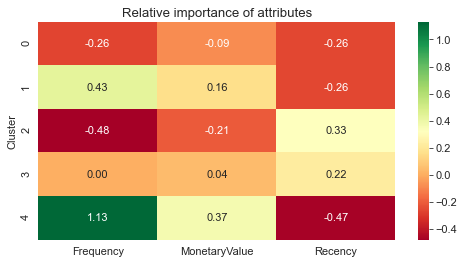

In [61]:
# Initialize a plot with a figure size of 8 by 2 inches 
plt.rcParams.update({'font.size': 11})
plt.figure(figsize = (8, 4))

# Add the plot title
plt.title('Relative importance of attributes')

# Plot the heatmap
sns.heatmap(data = relative_imp.iloc[:, 1:], annot = True, fmt='.2f', cmap='RdYlGn')
plt.show()